### Import libraries and data
### Data preparation for clustering
### Elbow technique
### K-means algorithm
### Visualizations
### Descripive statistics for clusters
### Results discussion

### Import libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
# import data 
path = r'C:\Users\darii\Documents\12-2023 Airbnb Analysis'
data=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'data_clean.pkl'))

### Data preparation for clustering

In [4]:
# chech data
data.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,nan,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [5]:
# keeping only numeric values
df = data [['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]

##### Reviews_per_month was excluded from this analysis as it's dimension/scale differs a lot from other variables what can lead to biased results. Other motivation is: there are two variables in regard to reviews on the website: 1) number of reviews reffers to the data in the apartment profile, which every user can view, and here the logic is - the more reviews, the more trustfull the content of the reviews 2) reviews per month is not visible for potential customers and is the KPI defining how often customers leave a review to an apartment. This variable can barely have influence on the price and vice versa.

###### *in general reviews are very relative and biased variables: 1) there is no data regarding the rating, but the fact of review left 2) fraud / fake potential 3) people tend to leave negative comments rather than positive (in how far - mentality specific)

### Elbow technique

In [7]:
# define potential number of clusters (range)
num_cl = range(1, 15) 


In [8]:
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [9]:
# applying algorithm
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
score

C:\Users\darii\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\darii\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\darii\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\darii\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-3837678212.5193186,
 -2385908892.646619,
 -1644619940.00418,
 -1120560297.624722,
 -845509154.546213,
 -727419895.2962419,
 -627887248.1083952,
 -553755960.1086885,
 -476412883.24156535,
 -435204917.96465755,
 -399376343.4732948,
 -366220746.2704275,
 -331896220.78079253,
 -308267556.0068569]

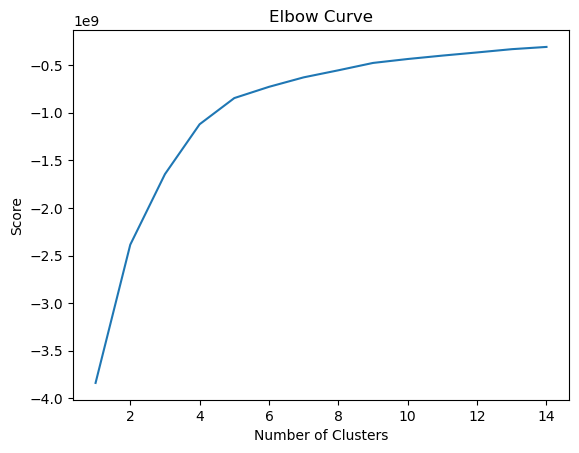

In [10]:
# visualize
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### 5 is the optimal number of clusters (the curve growth till 5 on the x-axes and then slows down / becomes practically a line not a curve)

### K-means algorithm

In [11]:
# reate k-means object

kmeans = KMeans(n_clusters = 5) 

In [12]:
# fit the k-means object to the data
kmeans.fit(df)

C:\Users\darii\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [13]:
# new column creation
df['clusters'] = kmeans.fit_predict(df)

C:\Users\darii\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\darii\AppData\Local\Temp\ipykernel_12072\1304750186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [14]:
# column creation check
df.head(10)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,clusters
0,149,1,9,6,365,1
1,225,1,45,2,355,1
2,150,3,0,1,365,1
3,89,1,270,1,194,1
4,80,10,9,1,0,0
5,200,3,74,1,129,0
6,60,45,49,1,0,0
7,79,2,430,1,220,1
8,79,2,118,1,0,0
9,150,1,160,4,188,1


In [15]:
# check observation amount in clusters
df['clusters'].value_counts()

clusters
0    30812
1    15161
4     2748
3      148
2       26
Name: count, dtype: int64

### Visualizations

##### Price & minimum nights

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


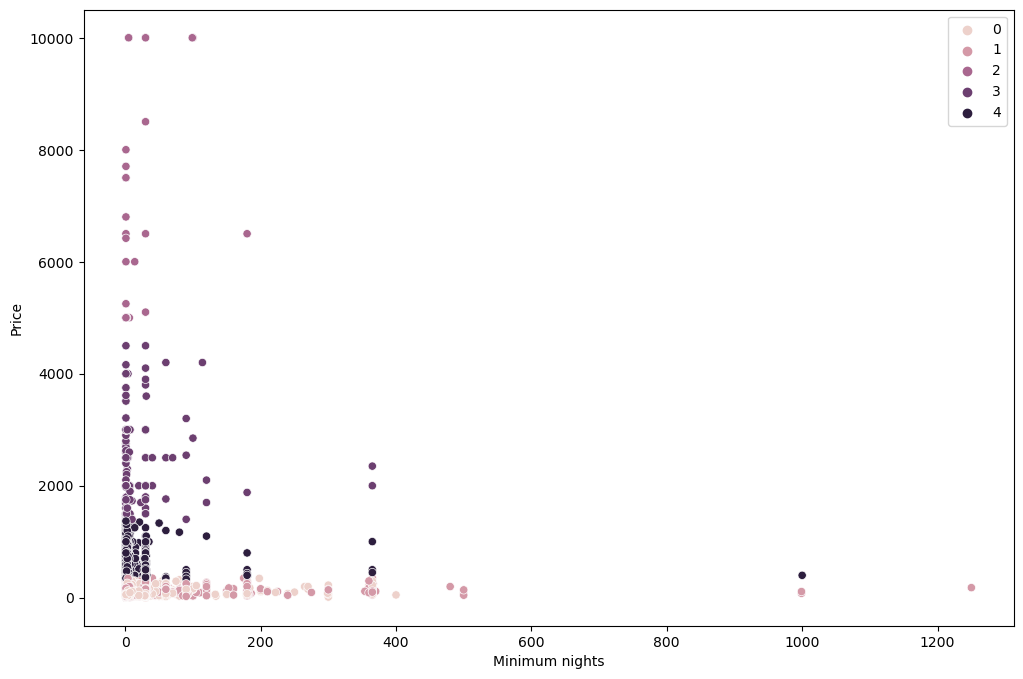

In [17]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['minimum_nights'], y=df['price'], hue=kmeans.labels_) 


ax.grid(False) 
plt.xlabel('Minimum nights') 
plt.ylabel('Price') 
plt.show()

##### Visually clusters reffer basically to price - upper (on the graphic) three definetely, and the two on the bottom both have the same / similar price range. There are no clear groups regarding price and minimum nights.

##### Price & number of reviews

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


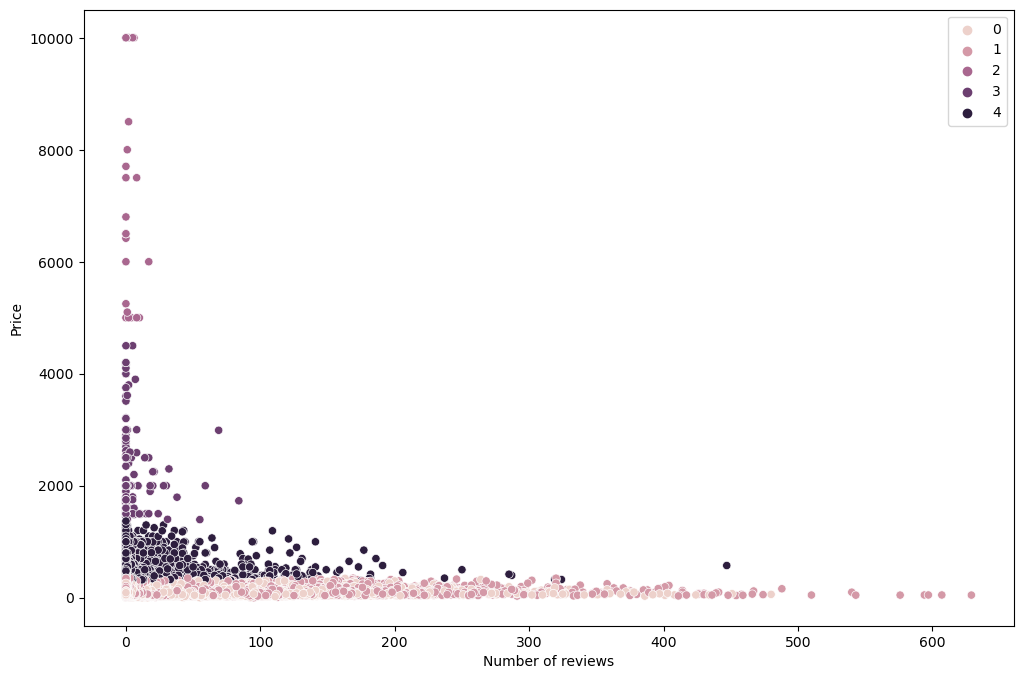

In [18]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['number_of_reviews'], y=df['price'], hue=kmeans.labels_) 


ax.grid(False) 
plt.xlabel('Number of reviews') 
plt.ylabel('Price') 
plt.show()

##### The same regarding price and number of reviews - no clear grouping in the bottom price area.

##### Price & host listings count

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


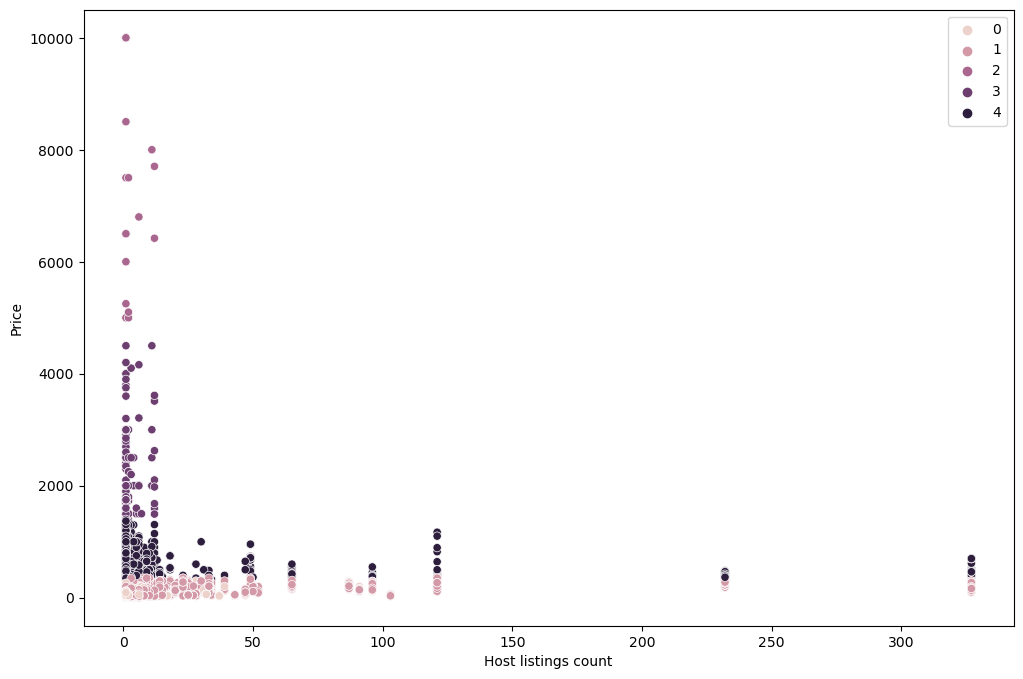

In [19]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['calculated_host_listings_count'], y=df['price'], hue=kmeans.labels_) 


ax.grid(False) 
plt.xlabel('Host listings count') 
plt.ylabel('Price') 
plt.show()

##### Same for price and host listings count - no clear defined groups in the lower price range.

##### Price & availability

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


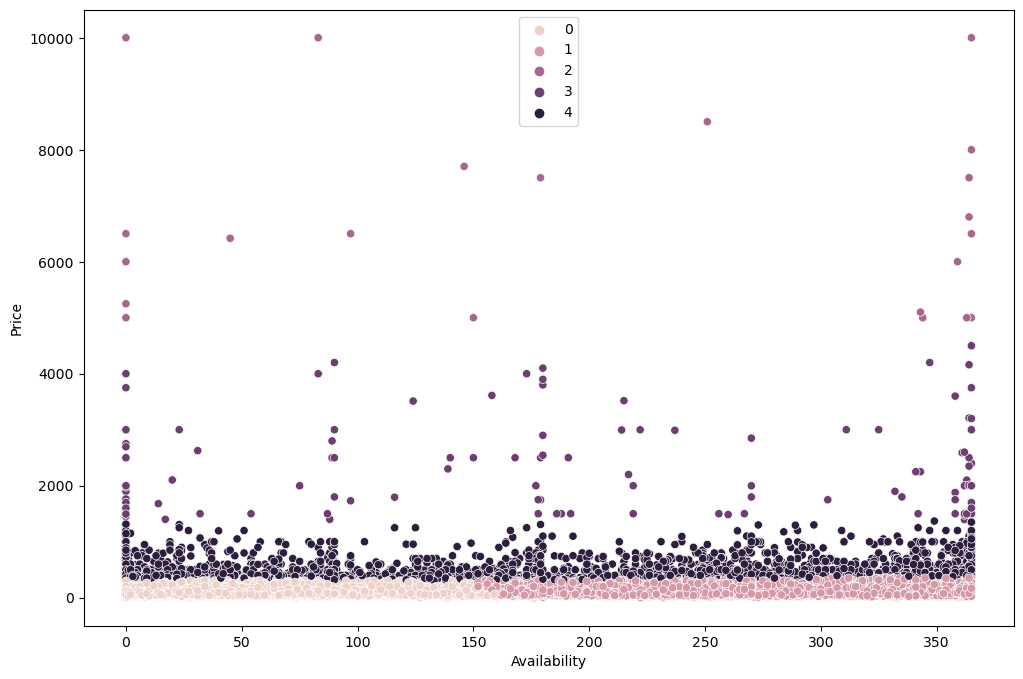

In [20]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['availability_365'], y=df['price'], hue=kmeans.labels_) 


ax.grid(False) 
plt.xlabel('Availability') 
plt.ylabel('Price') 
plt.show()

##### Finally clear defined lower price groups - here the data is devided based on the availability of apartments.

### Descripive statistics for clusters

In [22]:
df.groupby('clusters').agg({'minimum_nights':['mean', 'median'], 
                             'number_of_reviews':['mean', 'median'], 
                             'calculated_host_listings_count':['mean', 'median'],
                                'availability_365':['mean', 'median'],
                                'price':['mean', 'median']})

minimum_nights        number_of_reviews         \
                   mean median              mean median   
clusters                                                  
0              5.140205    2.0         17.935382    4.0   
1             10.667766    3.0         36.028890   10.0   
2             22.115385    2.0          2.653846    1.0   
3             19.675676    2.0          5.250000    0.0   
4              7.324964    3.0         13.937409    3.0   

         calculated_host_listings_count        availability_365         \
                                   mean median             mean median   
clusters                                                                 
0                              2.112554    1.0        25.536122    0.0   
1                             15.954093    2.0       281.445947  298.0   
2                              2.538462    1.0       178.115385  148.0   
3                              2.783784    1.0       180.500000  179.5   
4                             15.231077    1.0       156.214338  145.0   

                price          
                 mean  median  
clusters                       
0          116.015708   100.0  
1          128.911483   110.0  
2         7087.269231  6500.0  
3         2245.777027  2000.0  
4          517.296579   450.0

### Results discussion

##### Clustering algorithm devided entries into groups basically based on the price and partly on the availability. It didn't deliver very useful information, but made to rethink price categorizing (previously devided into 4 categories). 
##### It is to suggest to concentrate further analysis on the geographical variables as based on the previous research neighbourhood has more impact on the apartment price. Also type of the apartment (indirectly indicating the footage) has not been taken into concideration yet should be paid attention for.